# 2023-01-20 First Day
## Numerical Computation

## Instructor: Jed Brown, jed.brown@colorado.edu, ECOT 824

1. Who am I?
2. What is this course about?
3. How will it work?
4. Discussion
5. (maybe) First activity

In [1]:
using Plots
default(linewidth=3, legendfontsize=12, xtickfontsize=12, ytickfontsize=12)

# Positionality: Who am I?

* Jed Brown (he/him); you can call me Jed
* Math + Physics undergrad, MS Math, Dr.Sc. Environmental Engineering (Computational Glaciology)
* Postdoc and staff at Argonne National Laboratory (DOE Office of Science)
* CU since 2015
* Maintainer of open source software like [PETSc](https://petsc.org) and [libCEED](https://libceed.org)
* Cis-het white man (which unavoidably affects my experience in these spaces)

## Physical Prediction, Inference, and Design Group
* Develop and maintain open source libraries
* Research in fast/parallel algorithms, extensible software
* Partner with scientists and engineers in many disciplines: geoscience, aerospace, civil engineering, fusion
* Listen, learn about computational bottlenecks, build technology and communities

<video src="../img/ROPI_OutView.webm" width="100%" controls loop />

<video src="../img/schwarz-pendulum.webm" width="90%" controls loop />

# Prerequisites

## Calculus

* Fundamental Theorem of Calculus
* Differentiate and integrate polynomials
* Taylor series
* Gradients (we'll introduce and discuss)

We won't use integral tricks (and any time you spent on that was a waste; sorry)

## Linear Algebra

* vector spaces, orthogonality
* QR factorization
* projectors, reflectors, and rotations (will teach)

We'll never compute RREF or eigenvalues by hand (and any time you spent on that was a waste; sorry)

# What is Numerical Computation?

From [Trefethen (1992)](https://people.maths.ox.ac.uk/trefethen/publication/PDF/1992_55.pdf)

> Here is the wrong answer:
>> Numerical analysis is the study of rounding errors.

Trefethen goes on to propose
>> Numerical analysis is the study of algorithms for the problems of continuous mathematics.

> This stuff is like computer science meets calculus
>
> -- former student

# What is continuous mathematics?

* Continuous objects with finite representations on a computer
  * real and complex numbers $a \in \mathbb R$
  * vectors $\mathbf x \in \mathbb R^n$
  * matrices $A \in \mathbb R^{m\times n}$
* Continuous objects with infinite representations on a computer
  * functions $f: \mathbb R \to \mathbb R$
  * higher order functions: $g(f)$

## Finite vs Infinite algorithms

* Compute the matrix product $A B$
* Solve $A x = b$ for $x$
* Compute the eigenvalues $\lambda$ of $A \in \mathbb R^{10\times 10}$
* Compute $\int_a^b f(x)$

# Rootfinding

Given $f(x)$, find $x$ such that $f(x) = 0$.

* Cost
  * Evaluation of $f(x)$ and perhaps derivatives $f'(x)$.
  * Other arithmetic
* Convergence: how many evaluations to reach a given accuracy?
* Robustness: does the algorithm always converge?

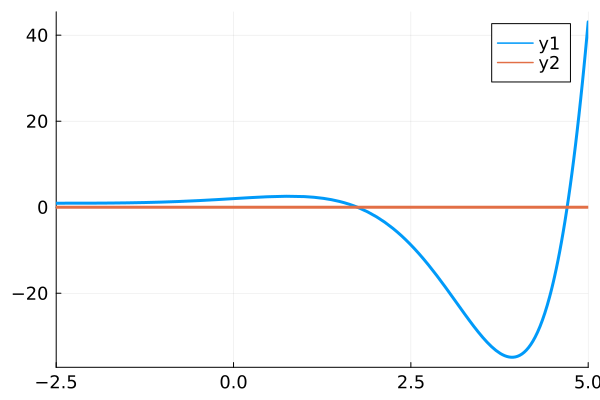

In [9]:
using Plots

f(x) = exp(x) * cos(x) + 1
plot([f, x -> 0], xlims=[-2.5, 5])

# Numerical linear algebra

## Finite algorithms for factorization
* $QR = A$, such that $Q^T Q = I$ and $R$ is right-triangular.
* $L U = A$, such that $L$ and $U$ are lower and upper triangular, respectively.

## Infinite (iterative) algorithms

* $X \Lambda X^{-1} = A$ where $\Lambda$ is diagonal.
* $U \Sigma V^T = A$, such that $U^T U = I$, $V^T V = I$, and $\Sigma$ is diagonal with nonnegative entries.
* Iterative solution of $Ax=b$ using Krylov basis $\{b, Ab, A^2b, \dotsc \}$

## Concepts
* Accurate estimates of cost
* Orthogonality, null spaces, projections
* Geometry and modeling
* Stable and backwards-stable algorithms
* Conditioning
* Develop a language in which to frame many concepts in the course

# Approximating functions from data

## Interpolation

Given samples $(x_0, f(x_0)), (x_1, f(x_1)), \dotsc$, determine an easily-computable function $g(x)$ that **exactly** fits these samples and behaves **sensibly** in between.

## Regression

Given **noisy** data $(x_0, y_0), (x_1, y_1), \dotsc$, determine an easily-computable function $g(x)$ that **explains** these data.

We will need to make subjective choices to specify a problem with a unique solution.

# Calculus: functions of functions

## Differentiation

Given a function $f(x)$ (as a computer program or callable function), define a new function

$$g(x) \approx f'(x). $$

We can do this
* Numerically (black box)
* By-hand code transformation
* Automatic code transformation

## Integration
Given a function $f(x)$ (as a computer program or callable function), approximate the integral

$$ \int_a^b f(x) . $$

# Numerical optimization

Given a scalar function $f(x)$ (and perhaps its gradient $f'(x)$), determine
$$ x_* = \operatorname{argmin}_x f(x) . $$

# Differential equations

Given a dynamical system
$$ \frac{\partial u(t)}{\partial t} = f(u(t)), $$
and initial condition $u(0) = u_0$, estimate $u(t)$ for arbitrary $t$.

# Higher dimensions

Many of these algorithms will generalize to functions of multiple variables.  Different algorithms may be needed for such "high-dimensional" problems.

# Computer Science = Runnable Abstraction Science

## In the "grinder"
* Mathematical language and principles for each major class of method
  * What is covered by theory
  * When you're venturing off-trail
  * Analytic tools to predict and debug
* Realistic cost and exploitable structure
  * Performance on modern hardware
* Write/modify stand-alone code
* Select and use (parallel) libraries

## How can you trust the solution?
* Verification: solving the problem right
* Validation: solving the right problem

## Abstractions/collaboration
* Domain scientists, engineers
* Optimizers, statisticians
* Abstractions that reduce cognitive load
* Metrics/visualization for decisions

# On programming languages

## C
Reliable and popular for libraries (PETSc, etc.). "Simple", unsafe, capable of encapsulation.

## C++
Popular with applications and some libraries. Powerful, but complicated and unsafe.

## Fortran
The OG of numerical computing. Good for "array programming", but encapsulation is hard. Unsafe depending on dialect.

## Julia
For ground-up examples in class and in activities. Capable of high performance, expressive multiple dispatch, works well in a notebook. Error messages are not great.

## Python
Good access to JIT, though with sharp edges. Poor native performance, but good libraries to compiled code.

## Rust
New compiled language. Good performance, encapsulation, safety, static analysis. Poor libraries (so far).

You don't need to know any of these well and you can choose the language for your project.

<img src="../img/Butler1988-Table1.png" width="80%" />

# I won't grade and I won't waste your time

<div class="floatleft70"

  * I will provide feedback   
  * I will be a mentor and guide navigating this field
  * I will help you get what you want out of the class (with a dash of wholesome context)

  > My mom said, "basically, your professor is asking you to be an adult". That was too flexible.

  > In other classes, I didn’t feel like I could bounce back, but in this one I did.
</div>

<div class="floatright30">
<a href="https://www.wvupressonline.com/ungrading"><img src="../img/Ungrading.jpg" width="100%" /></a>
</div>

# Formative vs Summative Assessment

## Formative

* Continual component of learning
* Check our understanding
* Guide next steps
* Collaborative
* Develops self-direction
* Surrounded by formative assessment throughout our careers
  * Learn to recognize these opportunities

## Summative

* Instructor evaluation of student understanding after a unit
* Driven by a need for "fairness" and "objectivity"
  * Permeates culture and goals of a class
  * Stifles creativity
* Often adversarial
* Goal is scoring/ranking, not learning itself
* Feels "cheap" when encountered in careers

This class centers formative assessment and the process by which you respond and reflect on it.

# What about the letter grade?

* Collect a portfolio of the work and insights you're most proud of
  * You can follow your creativity
* Journaling through the semester (setting goals, reflecting on formative assessments)
* Individual meetings during the last week of the semester (mid-term preview)
* We'll have a conversation and you'll propose a grade based on your portfolio
  * I'll trust you.

*I can nudge upward when students are too modest -- pretty common. In rare cases, I may adjust down.*

# What I need from you: Growth Mindset

<img src="../img/Henry2019-Table1.png" width="90%" />

# How will the semester look?

## Lecture periods
* Refresh, introduce, activity/group discussion, reflect
* Pointers to further resources/activities

## Readings and activities
* Annotate assigned readings
* (Short) coding, experiments, presentation of results
* Use the math and programming tools of the field
* Open-ended, go further occasionally

## Learning plans
* Write, track, and revise a personal learning plan.
* Meet/chat approx weekly to check in with partner

## Projects (second half of semester)
* Dig into community software that implements or relies on numerical computation
* Short presentation on how the community works
 * Key stakeholders
 * Strengths and weaknesses
* Discuss and critique

## Original study or contribution
* Tutorial, documentation, performance study, comparison, new features, new application
* Reflect in a short presentation

# Expectations

1. Enter with a growth mindset, practice adaptive coping, and nurture your intrinsic motivation
2. Attend class (in-person or virtual) and participate in discussions
3. Annotate assigned readings and respond thoughtfully to prompts
4. Make an honest attempt on activities
5. Interact with the class notebooks and read reference material
6 Set goals and track your progress
  * revise these goals as you learn more
7. Meet/chat with your partner weekly for at least a few minutes
  * share how lecture and activities are going
  * share your goals and how you're progressing
  * identify questions

8. Ask or answer at least one question per week
  * ask a question that you don't know the answer to
  * ask a question that you do know the answer to, but you think will be a good exercise/seed for discussion 
  * ask me during office hours, write up your best understanding
  * make a meme relevant to the class
  * raise a concern or suggestion that you and/or peers have
  * contribute an answer or relevant discussion to any of the above
9. Individual and group projects


# Advice from last year

"What advice would you give to your former self at the start of the term?"

> Come in with “learn as much as you can” rather than “get good grade”.

> Don’t get overwhelmed by “big dense equations”. Pay attention to initial concepts (stability, conditioning).

> Be serious about linear algebra.

> Take more initiative about how to manage time and structuring personal goals.

> Take your time and play with all the buttons, not “completionist”.

> Calm down and really write the functions, visualize, and experiment. Biggest regret was not engaging with programming activities to build concepts from class independently.

> Take things slow and don’t stress. Stay on top of topics, attend class, you’ll be okay.

# Tools

## Git and GitHub

* GitHub Classroom to manage repositories
* Write using notebooks and markdown
* Review using GitHub tools and nbgrader

## Zulip

* math- and code-aware team chat
* live, informal
* thread managemnet so a question in class can spin off into a deeper asynchronous conversation

## Jupyter

* RISE slides available on website
* Activities with scaffolding
* Nbgrader for writing feedback
* Works with many languages; we'll mostly use Julia
* Collaborative mode (new)

## JupyterHub: [coding.csel.io](https://coding.csel.io)
* Nothing to install, persistent storage
* Select `Numerical Computation` tile

# Poll: What is floating point arithmetic?

1. fuzzy arithmetic
2. exact arithmetic, correctly rounded
3. the primary focus of numerical analysis

In [3]:
0.1 + 0.2


0.30000000000000004

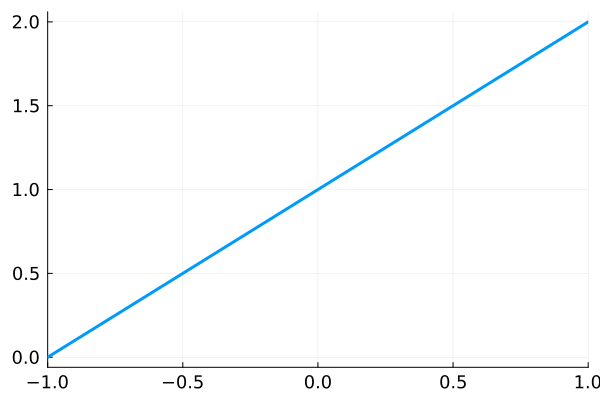

In [4]:
a = 1
plot(x -> 1 + x, xlim=(-a, a), legend=:none)

# Machine epsilon

We approximate real numbers with **floating point** arithmetic, which can only represent discrete values. In particular, there exists a largest number, which we call $\epsilon_{\text{machine}}$, such that
$$ 1 \oplus x = 1 \quad \text{for all}\  \lvert x \rvert < \epsilon_{\text{machine}}.$$

The notation $\oplus, \ominus, \odot, \oslash$ represent the elementary operation carried out in floating point arithmetic.

In [5]:
eps = 1
while 1 + eps != 1
    eps = eps / 2
end
eps

1.1102230246251565e-16

# Beating `exp`

$$e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dotsb$$

Suppose we want to compute $f(x) = e^x - 1$ for small values of $x$.

In [6]:
f1(x) = exp(x) - 1
y1 = f1(1e-8)

9.99999993922529e-9

In [7]:
f2(x) = x + x^2/2 + x^3/6
y2 = f2(1e-8)

1.000000005e-8

Which answer is more accurate?

In [8]:
@show (y1 - y2)        # Absolute difference
@show (y1 - y2) / y2;  # Relative difference

y1 - y2 = -1.1077470910720506e-16
(y1 - y2) / y2 = -1.1077470855333152e-8
